In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import AUC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.metrics import AUC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

2024-07-14 17:40:19.339883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 17:40:19.363446: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 17:40:19.363485: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-14 17:40:19.391537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar los datos
X = np.load('audio_features.npy')
y = np.load('audio_labels.npy')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [93]:
y_train

array([1., 1., 1., ..., 0., 0., 0.])

In [3]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [85]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(768, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),
    Conv1D(64, kernel_size=3, activation='relu'),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(768, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [4]:


model = Sequential([
    Conv1D(80, kernel_size=5, activation='relu', input_shape=(768, 1)),
    Conv1D(40, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Conv1D(32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=5, activation='relu'),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-14 17:40:27.187865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-14 17:40:27.213344: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-14 17:40:27.213391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kerne

In [70]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
class BestEpochCallback(Callback):
    def on_train_begin(self, logs=None):
        self.best_epoch = 0
        self.best_val_loss = float('inf')
        
    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs['val_accuracy']
        if val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            self.best_epoch = epoch + 1 # epochs are zero-indexed in logs
        print(f' \n     Best epoch so far: {self.best_epoch} with val_accuracy: {self.best_val_loss:.4f}')

best_epoch_callback = BestEpochCallback()

In [7]:
best_epoch_callback = BestEpochCallback()
optimizer = Adam(learning_rate=0.001)  # Iniciar con un learning rate más alto
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Configurar Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001, verbose=1)

# Entrenar el modelo con pesos de clase
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr,best_epoch_callback], class_weight=class_weights)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 764, 80)        │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 760, 40)        │        16,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 380, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 380, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 376, 32)        │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 188, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 184, 16)        │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 184, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2944)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,507,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,533,881 (5.85 MB)

 Trainable params: 1,533,881 (5.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1720978835.930167    2079 service.cc:145] XLA service 0x7f368800cfe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720978835.930221    2079 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-07-14 17:40:35.972929: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-14 17:40:36.172489: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


13/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4579 - loss: 0.6980

I0000 00:00:1720978840.678665    2079 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4714 - loss: 0.6959 
     Best epoch so far: 1 with val_accuracy: 0.4134
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.4725 - loss: 0.6958 - val_accuracy: 0.4134 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4929 - loss: 0.6919 
     Best epoch so far: 1 with val_accuracy: 0.4134
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4939 - loss: 0.6918 - val_accuracy: 0.6472 - val_loss: 0.6764 - learning_rate: 0.0010
Epoch 3/200
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6013 - loss: 0.6791 
     Best epoch so far: 1 with val_accuracy: 0.4134
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5994 - loss: 0.6794 - val_accuracy: 0.5010 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 4/200
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5640 - loss: 0.6812 
     Best epoch so far: 1 with val_accuracy: 0.4134
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15m

In [8]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

# Predecir en los datos de validación
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1'])
print(report)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.6118 
Validation loss: 0.6236208081245422, Validation accuracy: 0.6346555352210999
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

     Clase 0       0.59      0.38      0.46       198
     Clase 1       0.65      0.81      0.72       281

    accuracy                           0.63       479
   macro avg       0.62      0.60      0.59       479
weighted avg       0.63      0.63      0.62       479



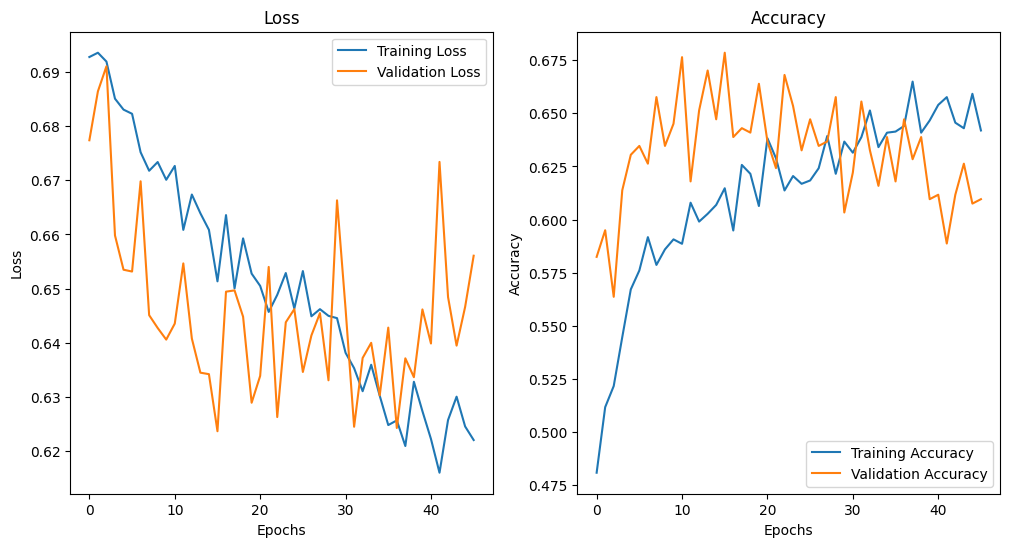

In [150]:
# Graficar las curvas de aprendizaje
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Calcular pesos de clase
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Definir la función de modelo para Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters1', min_value=16, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size1', values=[3, 5, 7]),
                     activation='relu',
                     input_shape=(768, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Conv1D(filters=hp.Int('filters2', min_value=16, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size2', values=[3, 5, 7]),
                     activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Flatten())
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dropout3', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

# Configurar el tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_tuning'
)

# Configurar Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# Realizar la búsqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], class_weight=class_weights)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of filters in the first convolutional
layer is {best_hps.get('filters1')} with a kernel size of {best_hps.get('kernel_size1')}.
The optimal number of filters in the second convolutional layer is {best_hps.get('filters2')} with a kernel size of {best_hps.get('kernel_size2')}.
The optimal number of units in the densely-connected layer is {best_hps.get('units')}.
The optimal dropout rates are {best_hps.get('dropout1')}, {best_hps.get('dropout2')}, and {best_hps.get('dropout3')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Construir el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], class_weight=class_weights)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Graficar las curvas de aprendizaje
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()